In [1]:
import pandas as pd
!pip install zstandard # Install the missing 'zstandard' library
file = '/content/dataset1_rideshare.csv.zst'

df = pd.read_csv(file, compression='zstd')
df.head()
df.shape

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 37.2 MB/s eta 0:00:00


(693071, 57)

In [2]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

#from ydata_profiling import ProfileReport

In [3]:
df.head().T

,0,1,2,3,4
id,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,4bd23055-6827-41c6-b23b-3c491f24e74d,981a3613-77af-4620-a42a-0c0866077d1e,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,e0126e1f-8ca9-4f2e-82b3-50505a09db9a
timestamp,1544952607.89,1543284023.677,1543366822.198,1543553582.749,1543463360.223
hour,9,2,1,4,3
day,16,27,28,30,29
month,12,11,11,11,11
datetime,2018-12-16 09:30:07,2018-11-27 02:00:23,2018-11-28 01:00:22,2018-11-30 04:53:02,2018-11-29 03:49:20
timezone,America/New_York,America/New_York,America/New_York,America/New_York,America/New_York
source,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square,Haymarket Square
destination,North Station,North Station,North Station,North Station,North Station
cab_type,Lyft,Lyft,Lyft,Lyft,Lyft


In [4]:
# Shape and size of the dataset
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 693071
Number of columns: 57


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [6]:
df = df.drop(['id', 'datetime', 'timezone', 'timestamp','long_summary'], axis=1)

In [13]:
print("Number of duplicates:", df.duplicated().sum())

Number of duplicates: 78063


In [14]:
df.drop_duplicates(inplace=True)
# Missing values
df.isnull().sum()

,0
hour,0
day,0
month,0
source,0
destination,0
cab_type,0
product_id,0
name,0
price,32942
distance,0


In [15]:
print(f"Missing values: \n{df.isnull().sum()}")

Missing values: 
hour                               0
day                                0
month                              0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          32942
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
visibility                         0
temperatureHigh                    0
temperatureHighTime                0
temperatureLow                     0
temperatureLowTime   

In [16]:
#Let's get rid of missing values by mean value
mean_value = round(df['price'].mean(),2)
print('Filling Price with mean value of', mean_value)
df['price'].fillna(value=mean_value, inplace=True)


Filling Price with mean value of 16.77


In [17]:
import matplotlib.pyplot as plt
numeric_cols = df.columns[df.dtypes != object]
categorical_cols = df.columns[df.dtypes == object]
len(numeric_cols)

45

In [18]:
df.head()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


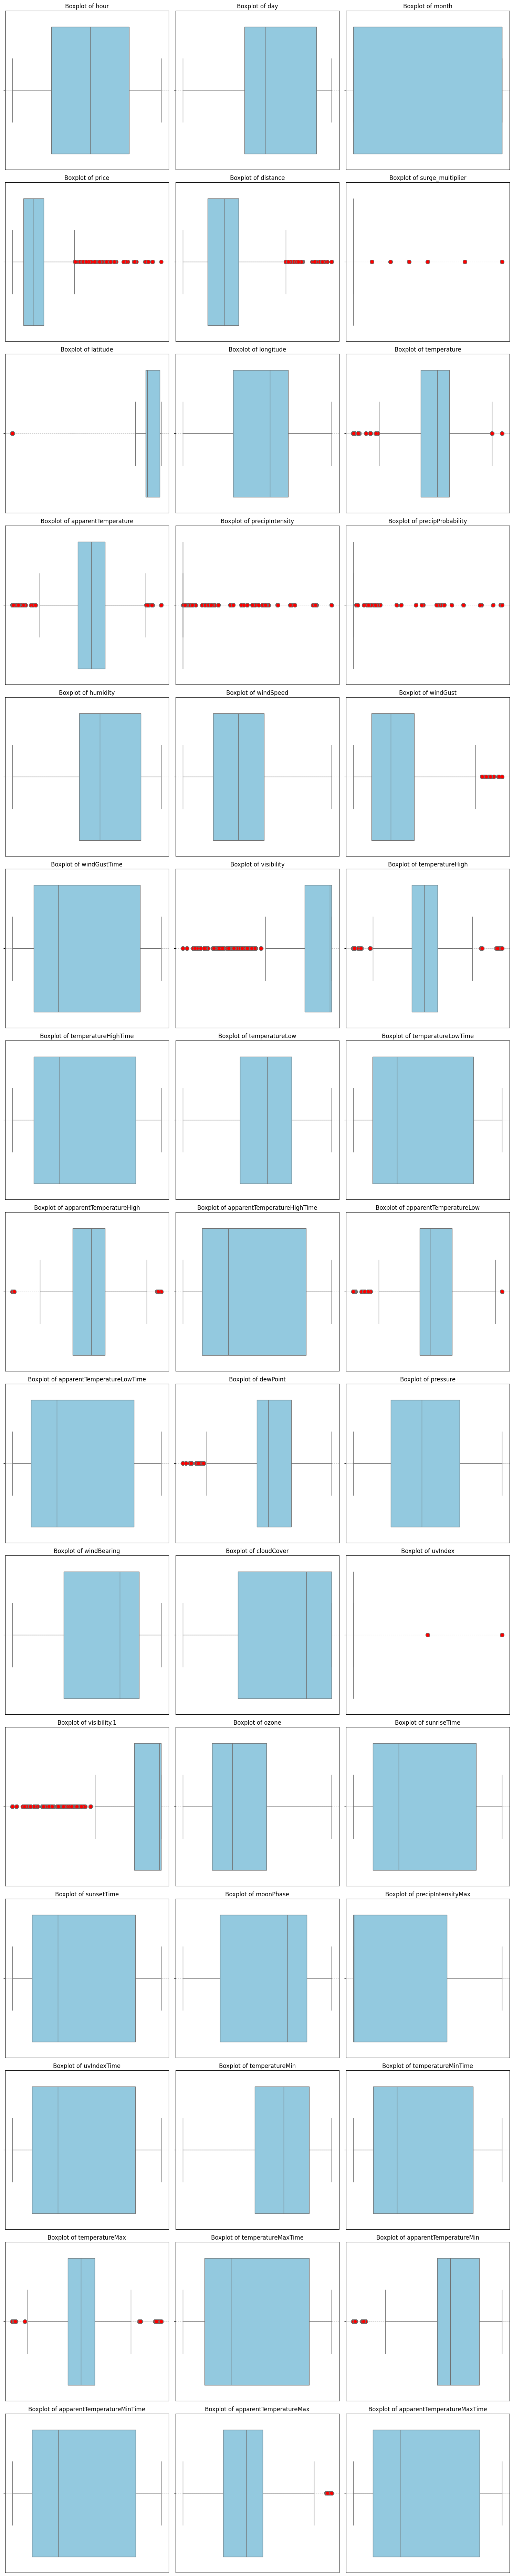

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate Q1, Q3, and IQR for each numeric column
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Identify outlier rows
outliers = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)
outlier_rows_index = outliers.any(axis=1)

# Prepare the figure for subplots
num_cols = len(numeric_cols)
num_rows = (num_cols + 2) // 3  # Calculate rows to fit all columns

plt.figure(figsize=(15, num_rows * 5))  # Adjust figure height dynamically

# Create a boxplot for each numeric column
for i, col in enumerate(numeric_cols):
    plt.subplot(num_rows, 3, i + 1)  # Dynamic subplot grid
    sns.boxplot(x=df[col], color="skyblue", flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel('')  # Remove unnecessary x-labels for cleaner plots
    plt.ylabel('')  # Remove unnecessary y-labels for cleaner plots
    plt.xticks([])  # Remove x-ticks to declutter
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a light grid for better readability

# Adjust layout
plt.tight_layout()
plt.show()


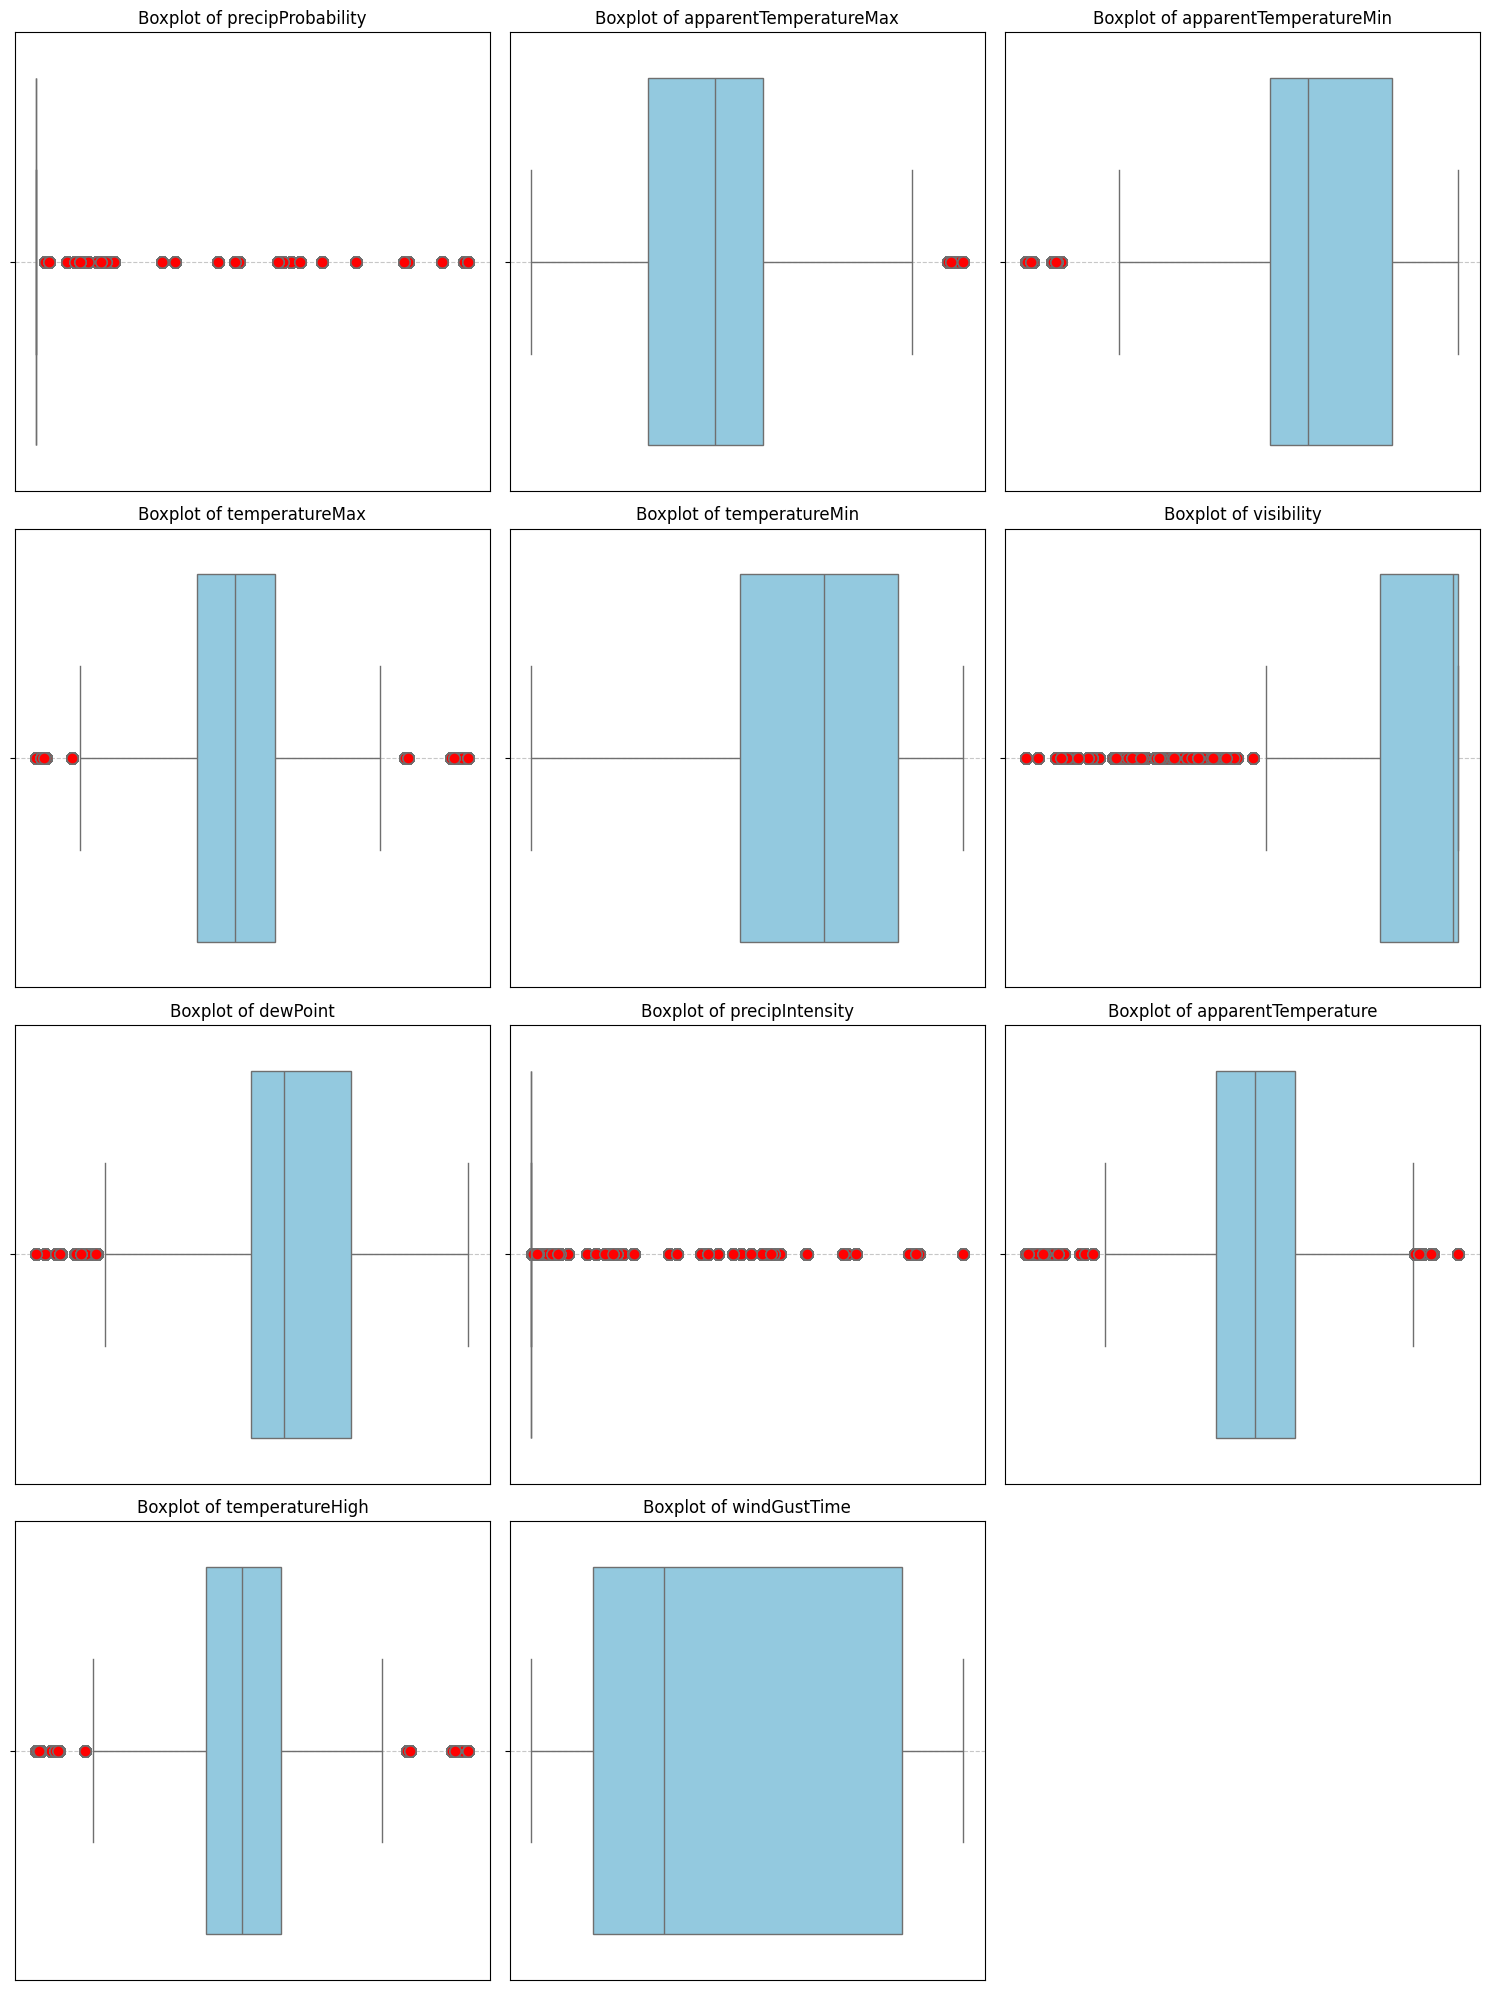

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'

# List of columns for outlier detection
outliers_cols = [
    'precipProbability', 'apparentTemperatureMax', 'apparentTemperatureMin',
    'temperatureMax', 'temperatureMin', 'visibility', 'dewPoint', 'precipIntensity',
    'apparentTemperature', 'temperatureHigh', 'windGustTime'
]

# Select only outlier columns
outlier_cols = [col for col in outliers_cols if col in df.columns]

# Calculate Q1, Q3, and IQR for each outlier column
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier limits
lower_bound = Q1 - (6 * IQR)
upper_bound = Q3 + (6 * IQR)

# Identify outliers
outliers = (df[outlier_cols] < lower_bound) | (df[outlier_cols] > upper_bound)
outlier_rows_index = outliers.any(axis=1)

# Prepare the figure for subplots
num_cols = len(outlier_cols)
num_rows = (num_cols + 2) // 3  # Calculate rows to fit all columns

plt.figure(figsize=(15, num_rows * 5))  # Adjust figure size dynamically

# Create boxplots for each outlier column
for i, col in enumerate(outlier_cols):
    plt.subplot(num_rows, 3, i + 1)  # Dynamic subplot grid
    sns.boxplot(
        x=df[col],
        color="skyblue",
        flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8}
    )
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel('')  # Remove unnecessary x-labels
    plt.ylabel('')  # Remove unnecessary y-labels
    plt.xticks([])  # Remove x-ticks for cleaner plots
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for readability

# Adjust layout for a clean and compact presentation
plt.tight_layout()
plt.show()


In [21]:
# Checking if two columns are same
mis = (df['visibility'] == df['visibility.1']).all()
mis


True

In [22]:
df = df.drop(['visibility.1', 'temperatureMax','apparentTemperatureMax'], axis=1)

In [23]:
df.head()

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,1544968800,33.73,1545012000,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,1543251600,36.20,1543291200,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,1543320000,31.04,1543377600,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,1543510800,30.30,1543550400,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,1543420800,29.11,1543392000,1543420800


In [24]:
df.groupby(['cab_type', 'name'])['price'].sum().sort_values(ascending=False)

,,price
cab_type,name,
Lyft,Lux Black XL,1605626.55
Uber,Black SUV,1491798.50
Lyft,Lux Black,1127057.55
Uber,Black,1016954.50
Lyft,Lux,866901.50
Uber,UberXL,783380.50
Lyft,Lyft XL,748207.70
Uber,Taxi,552437.34
Lyft,Lyft,471058.68


In [25]:
avg_distance = df.groupby(['cab_type', 'name'])['distance'].mean().reset_index()
avg_distance

,cab_type,name,distance
0,Lyft,Lux,2.199370
1,Lyft,Lux Black,2.214477
2,Lyft,Lux Black XL,2.198090
3,Lyft,Lyft,2.210368
4,Lyft,Lyft XL,2.192788
5,Lyft,Shared,2.191617
6,Uber,Black,2.250741
7,Uber,Black SUV,2.250631
8,Uber,Taxi,2.236304
9,Uber,UberPool,2.219555


In [26]:
cab_hour = df.groupby(['cab_type'])['hour'].value_counts().reset_index()
cab_hour[cab_hour['cab_type'] == 'Uber'].sort_values(by= ['hour'])

,cab_type,hour,count
25,Uber,0,14480
41,Uber,1,13021
36,Uber,2,13388
40,Uber,3,13054
38,Uber,4,13147
46,Uber,5,11854
39,Uber,6,13115
45,Uber,7,11903
47,Uber,8,11506
35,Uber,9,13553


In [27]:
cab_hour[cab_hour['cab_type'] == 'Lyft'].sort_values(by= 'hour')


,cab_type,hour,count
0,Lyft,0,13911
13,Lyft,1,11998
17,Lyft,2,11919
18,Lyft,3,11654
14,Lyft,4,11974
21,Lyft,5,10726
19,Lyft,6,11493
22,Lyft,7,10610
23,Lyft,8,10289
12,Lyft,9,12378


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='hour', ylabel='count'>

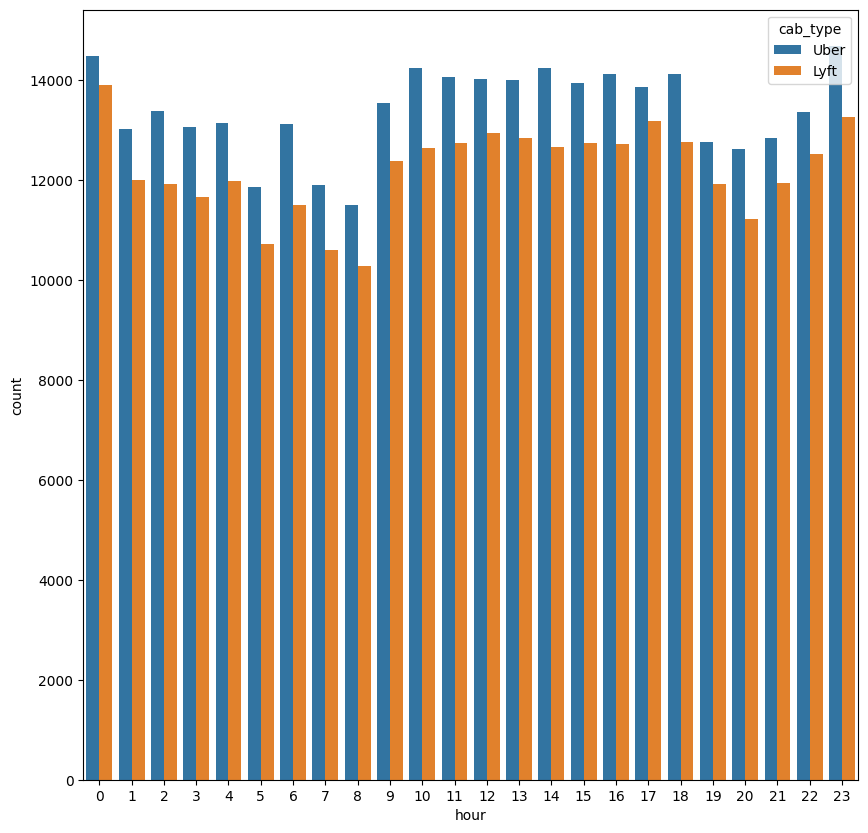

In [29]:
plt.figure(figsize=(10, 10))
sns.countplot(x='hour', data=df, hue= 'cab_type' )

,count
month,
12,368200
11,246808


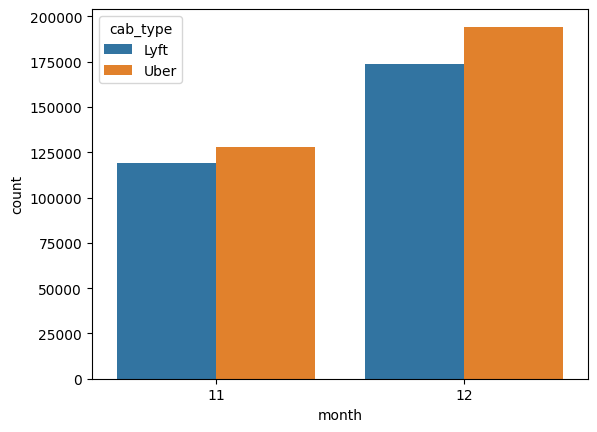

In [30]:
sns.countplot(x='month', data=df, hue= 'cab_type', )
df['month'].value_counts()

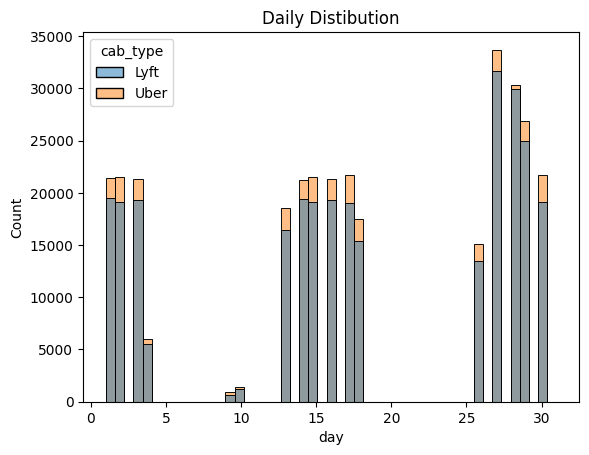

In [31]:
sns.histplot(x='day',data=df, bins = np.linspace(1,31), hue='cab_type')
plt.title("Daily Distibution")
# plt.tight_layout()
plt.show()

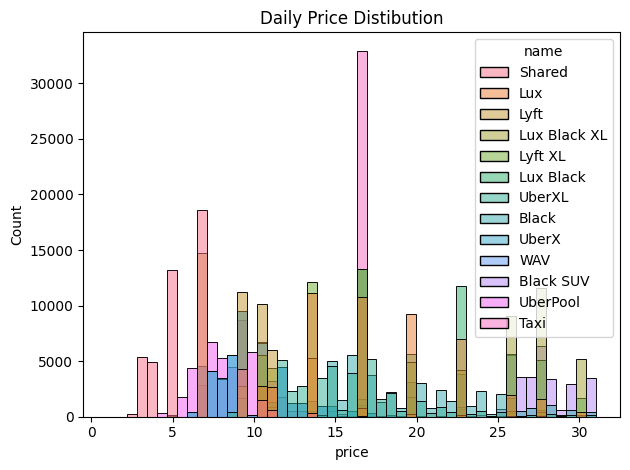

In [32]:
sns.histplot(x='price',data=df, bins = np.linspace(1,31), hue='name')
plt.title("Daily Price Distibution")
plt.tight_layout()
plt.show()

In [33]:
categorical_cols

Index(['source', 'destination', 'cab_type', 'product_id', 'name',
       'short_summary', 'icon'],
      dtype='object')

In [34]:
numeric_cols = df.columns[df.dtypes != object]

In [35]:
f_corr = ['hour', 'day', 'month', 'windGustTime', 'temperatureHighTime',
          'temperatureLowTime', 'apparentTemperatureHighTime','price']
cor = df[f_corr].corr()

<Axes: >

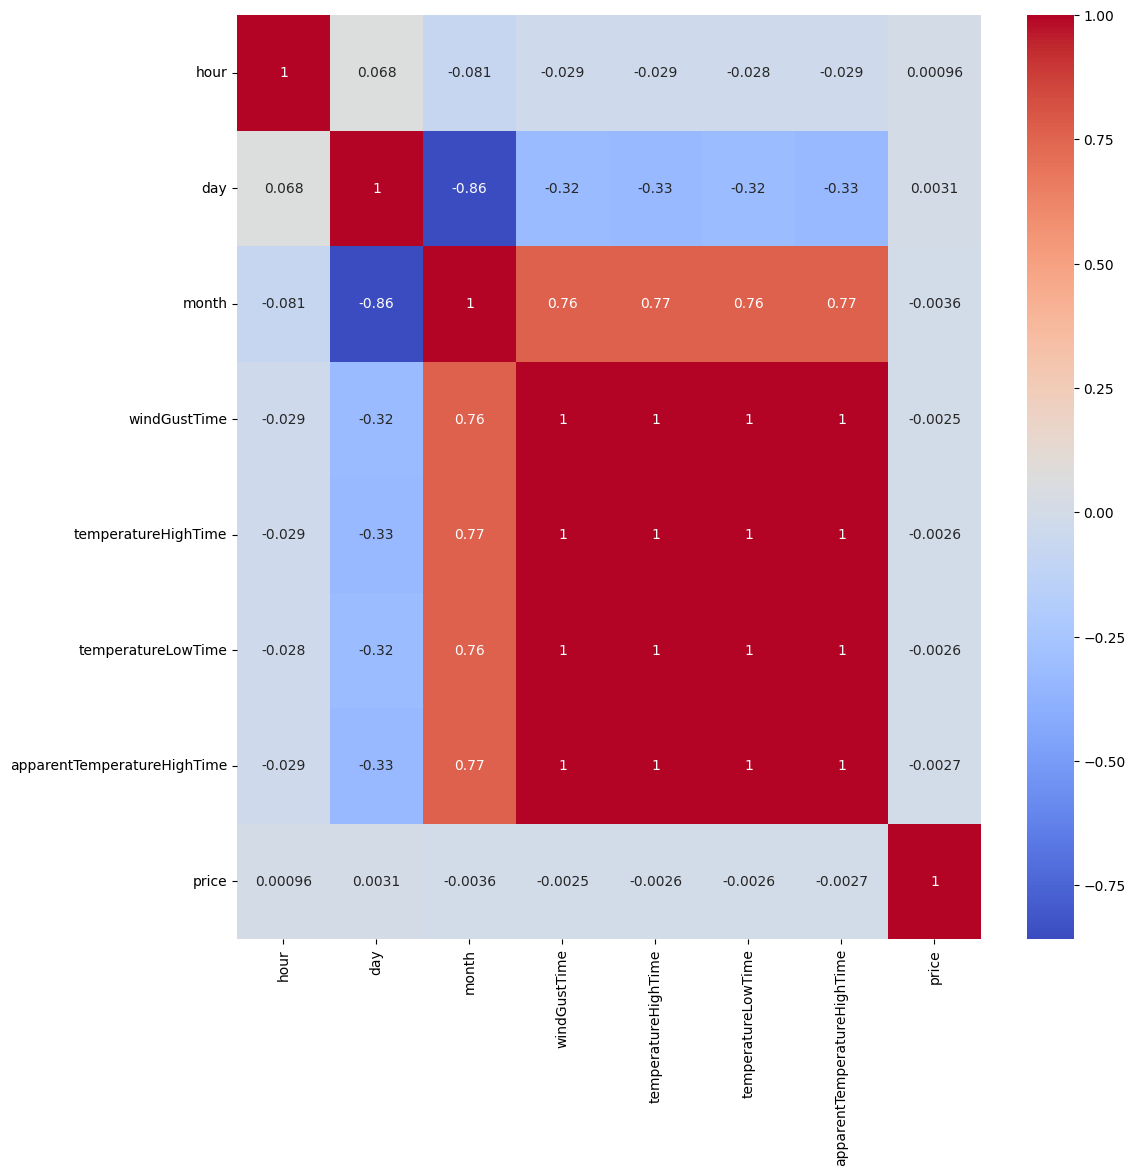

In [36]:
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [37]:
cor['price'].sort_values()

,price
month,-0.003568
apparentTemperatureHighTime,-0.002663
temperatureHighTime,-0.002645
temperatureLowTime,-0.002645
windGustTime,-0.002541
hour,0.000965
day,0.003149
price,1.000000


Because the correlation between the chosen columns and the 'price' is close to zero, it indicates a minimal linear relationship between them. As a result, these factors are unlikely to significantly contribute to explaining changes in the 'price'. We can drop them

In [38]:
cor['price'].sort_values()

,price
month,-0.003568
apparentTemperatureHighTime,-0.002663
temperatureHighTime,-0.002645
temperatureLowTime,-0.002645
windGustTime,-0.002541
hour,0.000965
day,0.003149
price,1.000000


In [39]:
# Check memory usage and data types
print(df.memory_usage(deep=True))

# Check the actual columns in the DataFrame
print(df.columns)

# Try to drop columns with errors='ignore' to avoid key errors if any columns are missing
df = df.drop(['uvIndex', 'windBearing', 'temperatureMaxTime', 'sunsetTime', 'sunriseTime', 'uvIndexTime', 'apparentTemperatureMaxTime'], axis=1, errors='ignore')

# Check the updated DataFrame
print(df.head())



Index                           4920064
hour                            4920064
day                             4920064
month                           4920064
source                         43150663
destination                    43177296
cab_type                       37515488
product_id                     49235837
name                           38935778
price                           4920064
distance                        4920064
surge_multiplier                4920064
latitude                        4920064
longitude                       4920064
temperature                     4920064
apparentTemperature             4920064
short_summary                  42289591
precipIntensity                 4920064
precipProbability               4920064
humidity                        4920064
windSpeed                       4920064
windGust                        4920064
windGustTime                    4920064
visibility                      4920064
temperatureHigh                 4920064


<Axes: >

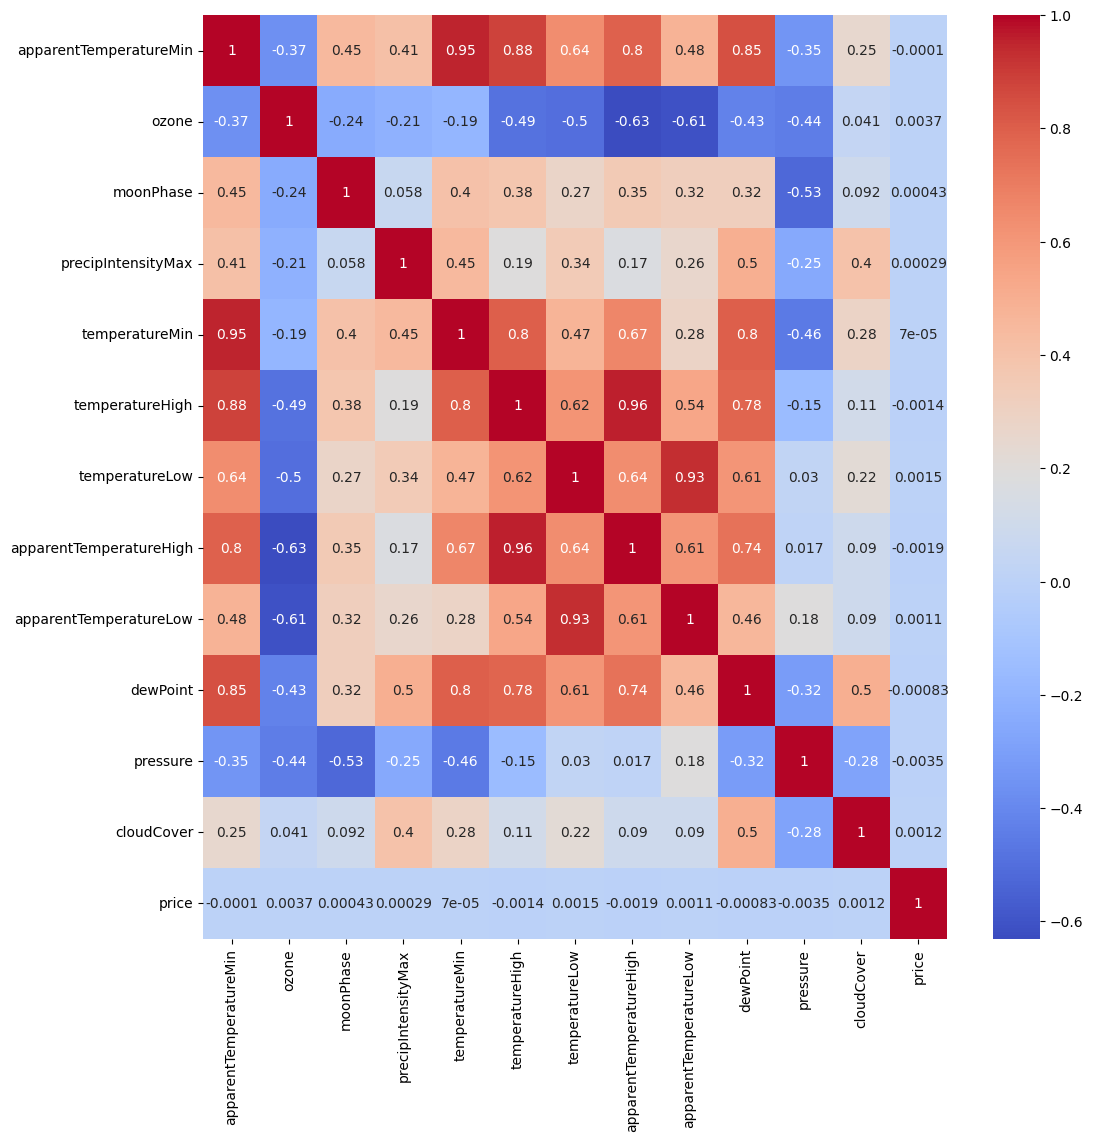

In [40]:
f_corr = ['apparentTemperatureMin','ozone',
 'moonPhase','precipIntensityMax','temperatureMin','temperatureHigh',
 'temperatureLow','apparentTemperatureHigh','apparentTemperatureLow',
          'dewPoint','pressure','cloudCover', 'price']
cor = df[f_corr].corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [41]:
cor['price'].sort_values()

,price
pressure,-0.003480
apparentTemperatureHigh,-0.001861
temperatureHigh,-0.001449
dewPoint,-0.000827
apparentTemperatureMin,-0.000101
temperatureMin,0.000070
precipIntensityMax,0.000292
moonPhase,0.000432
apparentTemperatureLow,0.001140
cloudCover,0.001199


In [42]:
# Check the actual columns in the DataFrame to see if the columns exist
print(df.columns)

# Try to drop columns, and ignore any that don't exist
df.drop(['temperatureHigh', 'precipIntensityMax', 'apparentTemperatureMin', 'apparentTemperatureLow', 'apparentTemperatureHigh', 'dewPoint', 'temperatureMin'], axis=1, inplace=True, errors='ignore')

# Check the updated DataFrame
print(df.head())


Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'windGustTime', 'visibility',
       'temperatureHigh', 'temperatureHighTime', 'temperatureLow',
       'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'icon', 'dewPoint', 'pressure',
       'cloudCover', 'ozone', 'moonPhase', 'precipIntensityMax',
       'temperatureMin', 'temperatureMinTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime'],
      dtype='object')
   hour  day  month            source    destination cab_type    product_id  \
0     9   16     12  Haymarket Square  North Station     Lyft     lyft_line   
1     2   27     11  Haymarket Square  Nor

<Axes: >

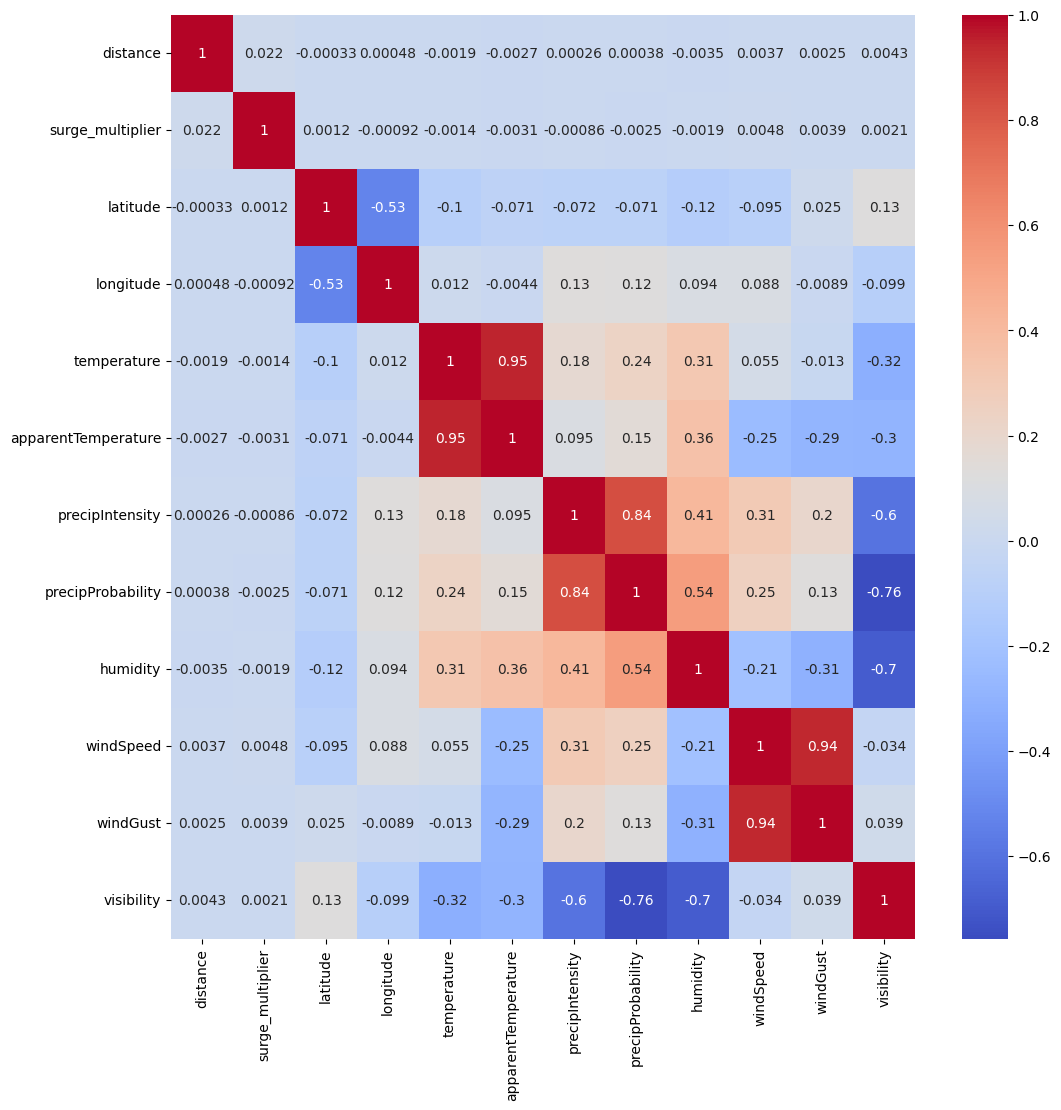

In [43]:
f_corr = ['distance','surge_multiplier','latitude','longitude','temperature','apparentTemperature',
 'precipIntensity','precipProbability','humidity','windSpeed','windGust','visibility']
cor = df[f_corr].corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [44]:
# Check for any NaNs or infinite values in the dataframe
if df[f_corr].isnull().values.any() or np.isinf(df[f_corr].values).any():
    print("Data contains NaNs or infinite values, which could cause blank spaces in heatmap.")
else:
    print("No NaNs or infinite values in the selected features.")

# Check data types of the columns
print("\nData types of the columns:")
print(df[f_corr].dtypes)

# Check for constant columns which can cause NaNs in correlation
constant_columns = [col for col in f_corr if df[col].nunique() == 1]
if constant_columns:
    print("\nThe following columns have a constant value and will not be included in the correlation matrix:")
    print(constant_columns)
    # Remove constant columns from the correlation
    f_corr = [col for col in f_corr if col not in constant_columns]

No NaNs or infinite values in the selected features.

Data types of the columns:
distance               float64
surge_multiplier       float64
latitude               float64
longitude              float64
temperature            float64
apparentTemperature    float64
precipIntensity        float64
precipProbability      float64
humidity               float64
windSpeed              float64
windGust               float64
visibility             float64
dtype: object


<Axes: >

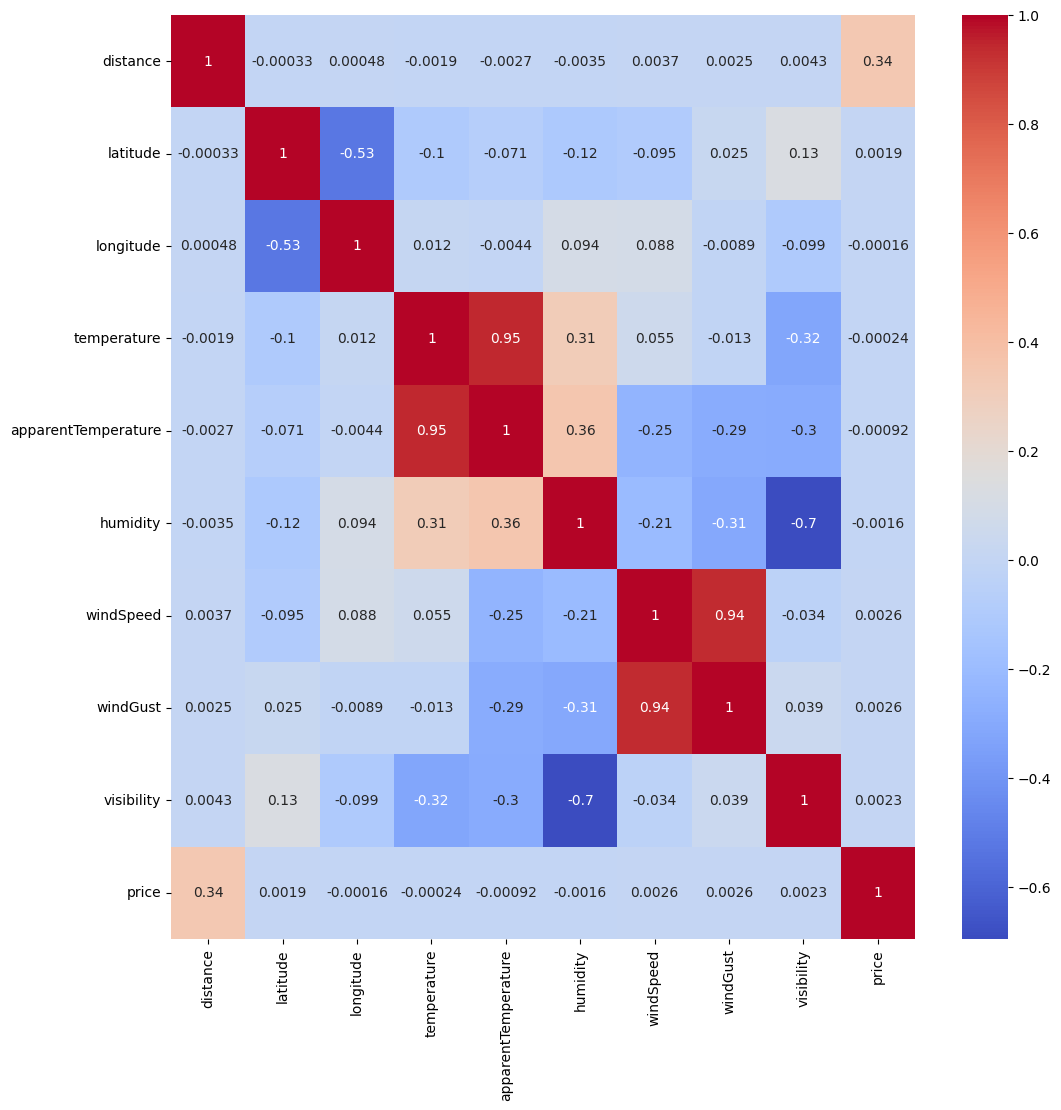

In [45]:
f_corr = ['distance','latitude','longitude','temperature','apparentTemperature',
 'humidity','windSpeed','windGust','visibility', 'price']
cor = df[f_corr].corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [46]:
cor['price'].sort_values()

,price
humidity,-0.001617
apparentTemperature,-0.000920
temperature,-0.000238
longitude,-0.000163
latitude,0.001892
visibility,0.002261
windSpeed,0.002626
windGust,0.002648
distance,0.338511
price,1.000000


In [47]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for i in categorical_cols:
    df[i] = encoder.fit_transform(df[i])

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [49]:
f = ['distance','surge_multiplier','name','cab_type']
X = df[f]
Y = df['price']

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42)

In [51]:
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'Y_train: {Y_train.shape}')
print(f'Y_test: {Y_test.shape}')

X_train: (461256, 4)
X_test: (153752, 4)
Y_train: (461256,)
Y_test: (153752,)


In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

print("Measuring on Testing set.\n")

# Calculating Mean Absolute Error
MAEValue_rf = mean_absolute_error(Y_test, y_pred_rf)
print('Mean Absolute Error Value is : ', MAEValue_rf)

# Calculating Mean Squared Error
MSEValue_rf = mean_squared_error(Y_test, y_pred_rf)
print('Mean Squared Error Value is : ', MSEValue_rf)

# Calculating r2_score
r2_scorevalue_rf = r2_score(Y_test, y_pred_rf)
print('R-squared score is : ', r2_scorevalue_rf)


Measuring on Testing set.

Mean Absolute Error Value is :  1.1156439810643581
Mean Squared Error Value is :  3.0940626876508115
R-squared score is :  0.9633636549257708


In [54]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the XGBRegressor model
xgboost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgboost_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_xgb = xgboost_model.predict(X_test)

print("Measuring on Testing set.\n")

# Calculating Mean Absolute Error
MAEValue_xgb = mean_absolute_error(Y_test, y_pred_xgb)
print('Mean Absolute Error Value is : ', MAEValue_xgb)

# Calculating Mean Squared Error
MSEValue_xgb = mean_squared_error(Y_test, y_pred_xgb)
print('Mean Squared Error Value is : ', MSEValue_xgb)

# Calculating r2_score
r2_scorevalue_xgb = r2_score(Y_test, y_pred_xgb)
print('R-squared score is : ', r2_scorevalue_xgb)


Measuring on Testing set.

Mean Absolute Error Value is :  1.15346405759867
Mean Squared Error Value is :  3.1820356734185586
R-squared score is :  0.962321979630483


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Scale the features (SVR performs better with feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVR model with an RBF kernel
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the SVR model
svr_model.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test_scaled)

print("Measuring on Testing set.\n")

# Calculating Mean Absolute Error
MAEValue_svr = mean_absolute_error(Y_test, y_pred_svr)
print('Mean Absolute Error Value is : ', MAEValue_svr)

# Calculating Mean Squared Error
MSEValue_svr = mean_squared_error(Y_test, y_pred_svr)
print('Mean Squared Error Value is : ', MSEValue_svr)

# Calculating r2_score
r2_scorevalue_svr = r2_score(Y_test, y_pred_svr)
print('R-squared score is : ', r2_scorevalue_svr)

